In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf, adfuller
import statsmodels.api as sm

In [2]:
oil = pd.read_csv('Oil.csv')
df = oil.copy()

In [3]:
oil

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11-05-2012,85.65,185846.0,84.65,85.90,84.34
2544,11-02-2012,84.86,273619.0,86.91,87.24,84.66
2545,11-01-2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2548 non-null   object 
 1   Close/Last  2548 non-null   float64
 2   Volume      2517 non-null   float64
 3   Open        2548 non-null   float64
 4   High        2548 non-null   float64
 5   Low         2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [5]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [6]:
df.isnull().sum()

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [7]:
df.fillna(df.Volume.median(),inplace=True)
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
10/28/2022,87.90,241417.0,88.67,88.76,87.08
10/27/2022,88.26,273717.0,88.26,89.79,87.33
10/26/2022,87.91,271474.0,85.07,88.41,84.14
10/25/2022,85.32,226337.0,84.88,86.03,83.06
10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-10-28,87.90,241417.0,88.67,88.76,87.08
2022-10-27,88.26,273717.0,88.26,89.79,87.33
2022-10-26,87.91,271474.0,85.07,88.41,84.14
2022-10-25,85.32,226337.0,84.88,86.03,83.06
2022-10-24,84.58,238458.0,85.24,85.92,82.63


In [12]:
df.sort_index(inplace=True)
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-10-30,85.68,363816.0,85.68,85.68,85.68
2012-10-31,86.24,192354.0,85.73,87.19,85.61
2012-11-01,87.09,185097.0,86.10,87.42,85.92
2012-11-02,84.86,273619.0,86.91,87.24,84.66
2012-11-05,85.65,185846.0,84.65,85.90,84.34


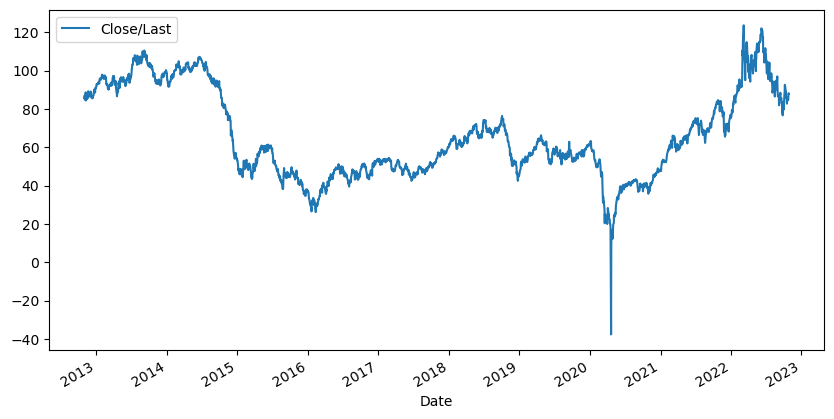

In [13]:
#plot the graph
df['Close/Last'].plot(figsize=(10,5), label='Close/Last')
plt.legend(loc='best')

In [14]:
df['Close/Last'].unique()

array([85.68, 86.24, 87.09, ..., 85.32, 87.91, 87.9 ])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2012-10-30 to 2022-10-28
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2548 non-null   float64
 1   Volume      2548 non-null   float64
 2   Open        2548 non-null   float64
 3   High        2548 non-null   float64
 4   Low         2548 non-null   float64
dtypes: float64(5)
memory usage: 119.4 KB


In [16]:
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-10-30,85.68,363816.0,85.68,85.68,85.68
2012-10-31,86.24,192354.0,85.73,87.19,85.61
2012-11-01,87.09,185097.0,86.10,87.42,85.92
2012-11-02,84.86,273619.0,86.91,87.24,84.66
2012-11-05,85.65,185846.0,84.65,85.90,84.34
...,...,...,...,...,...
2022-10-24,84.58,238458.0,85.24,85.92,82.63
2022-10-25,85.32,226337.0,84.88,86.03,83.06
2022-10-26,87.91,271474.0,85.07,88.41,84.14


In [17]:
#df['Close/Last'] = df['Close/Last'].round(decimals=False)

In [18]:
# Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
#result = seasonal_decompose(x=df['Close/Last'], model='additive')

In [18]:
ts_data = df['Close/Last']

In [19]:
ts_data_lag = np.log(ts_data)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


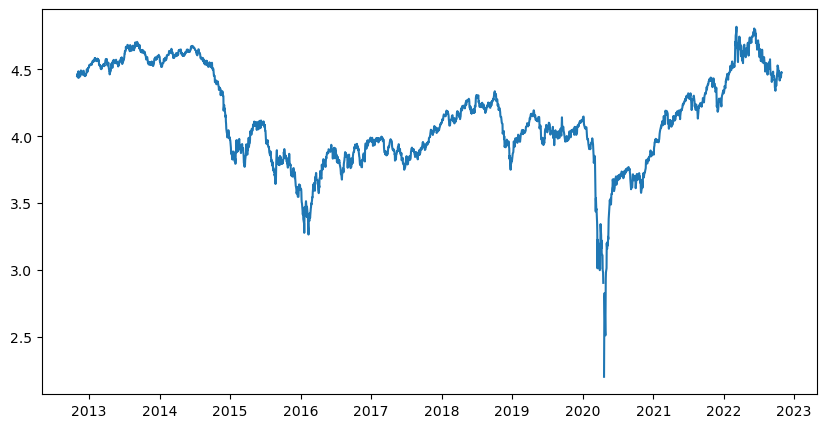

In [20]:
plt.figure(figsize =(10,5))
plt.plot(ts_data_lag)

In [21]:
def test_stationarity(timeseries):
    
    #caluculate the rolling mean & standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean , color='red', label= 'Rolling_mean')
    std = plt.plot(rolstd, color = 'green', label= 'Rolling std')
    plt.legend(loc='best')
    
    print('Results of Dickey-Fuller test : \n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index=['Test statistics','P-value', '#Lags Used', 'Number of observation used'])
    for i, j in df_test[4].items():
        my_output['Critical value (%s)'%i] = j
    print(my_output)

Results of Dickey-Fuller test : 

Test statistics                 -1.822010
P-value                          0.369590
#Lags Used                      16.000000
Number of observation used    2531.000000
Critical value (1%)             -3.432936
Critical value (5%)             -2.862683
Critical value (10%)            -2.567378
dtype: float64


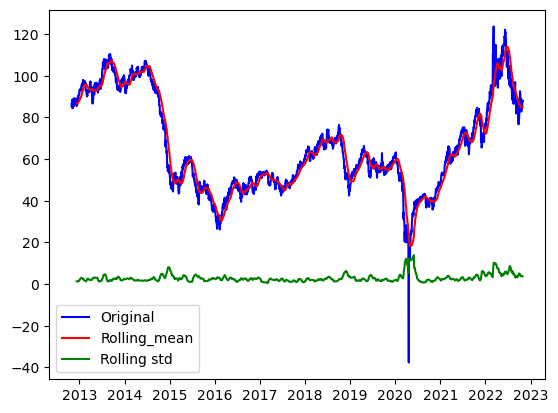

In [22]:
test_stationarity(df['Close/Last'])

In [23]:
ts_data_log = pd.DataFrame(ts_data_lag,columns=None)
ts_data_log

,Close/Last
Date,
2012-10-30,4.450619
2012-10-31,4.457134
2012-11-01,4.466942
2012-11-02,4.441003
2012-11-05,4.450269
...,...
2022-10-24,4.437698
2022-10-25,4.446409
2022-10-26,4.476314


In [24]:
ts_data_log.dropna(inplace=True)
ts_data_log.isnull().sum()

Close/Last    0
dtype: int64

Results of Dickey-Fuller test : 

Test statistics                 -2.412704
P-value                          0.138183
#Lags Used                      23.000000
Number of observation used    2523.000000
Critical value (1%)             -3.432945
Critical value (5%)             -2.862686
Critical value (10%)            -2.567380
dtype: float64


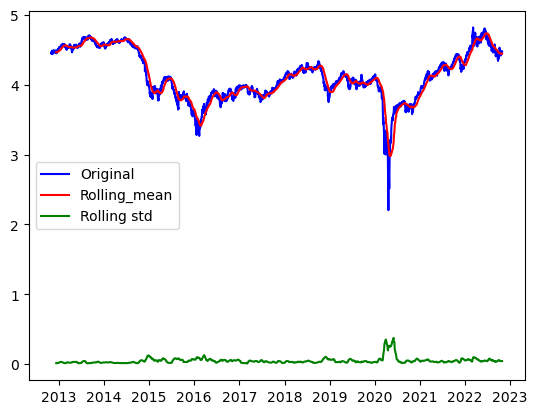

In [25]:
test_stationarity(ts_data_log)

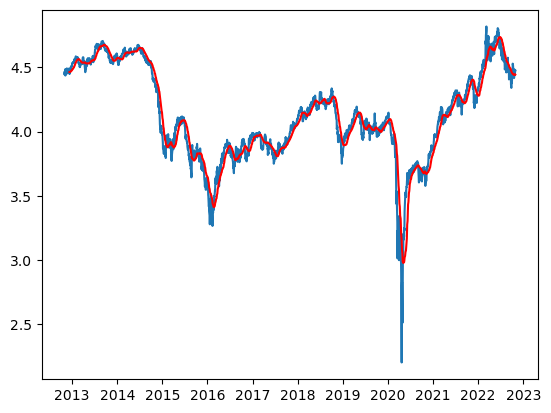

In [26]:
movingAverage = ts_data_log.rolling(window=30).mean()
movingStd = ts_data_log.rolling(window=30).std()

plt.plot(ts_data_log)
plt.plot(movingAverage, color='red')

In [27]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)
ts_data_log_diff.dropna(inplace=True)

Results of Dickey-Fuller test : 

Test statistics              -8.058373e+00
P-value                       1.668599e-12
#Lags Used                    2.300000e+01
Number of observation used    2.494000e+03
Critical value (1%)          -3.432975e+00
Critical value (5%)          -2.862700e+00
Critical value (10%)         -2.567387e+00
dtype: float64


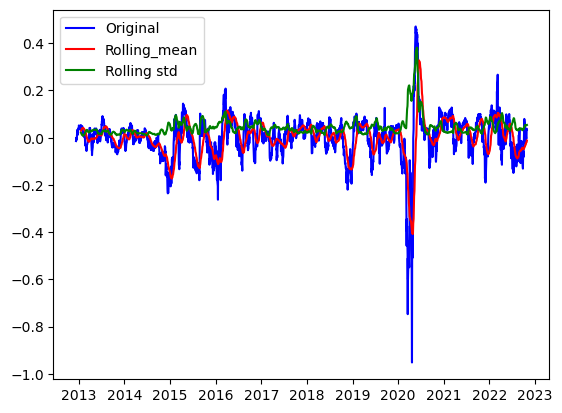

In [28]:
test_stationarity(ts_data_log_diff)

In [29]:
#ploting the acf and pacf graph

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
acf_values = acf(ts_data_log_diff)
acf_values

array([ 1.00000000e+00,  9.41560927e-01,  8.94020260e-01,  8.55553562e-01,
        8.26510364e-01,  7.83060900e-01,  7.35835008e-01,  6.91629196e-01,
        6.53986688e-01,  6.09369854e-01,  5.61129333e-01,  5.24403617e-01,
        4.96671992e-01,  4.64549170e-01,  4.31250542e-01,  3.94594644e-01,
        3.64347212e-01,  3.29402042e-01,  2.95889187e-01,  2.66305975e-01,
        2.44280275e-01,  2.16578384e-01,  1.94235586e-01,  1.64211786e-01,
        1.36683948e-01,  1.12659017e-01,  9.15515226e-02,  7.13142125e-02,
        5.33897145e-02,  3.92549402e-02,  1.78536246e-02, -7.99740174e-04,
       -1.85813233e-02, -3.03936704e-02, -4.40211563e-02])

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


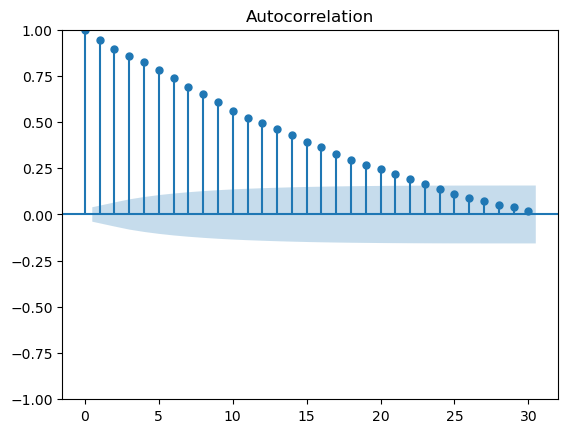

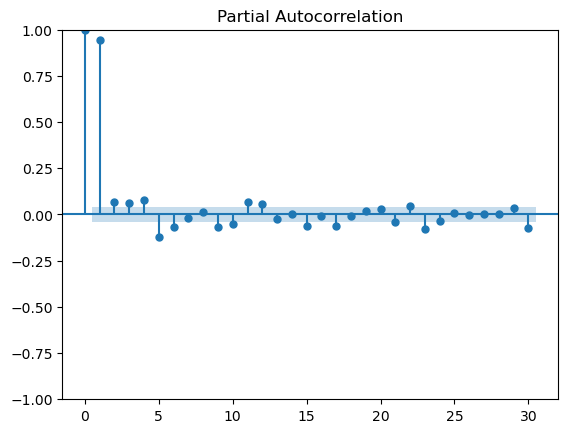

In [32]:
plot_acf(ts_data_log_diff, lags=30);
plot_pacf(ts_data_log_diff, lags=30);

In [36]:
pacf_values = pacf(ts_data_log_diff)
pacf_values

array([ 1.00000000e+00,  9.41935007e-01,  6.64195898e-02,  6.42233488e-02,
        7.90809629e-02, -1.21407495e-01, -6.62605333e-02, -1.85879341e-02,
        1.12099498e-02, -6.87478199e-02, -5.29300760e-02,  6.73845230e-02,
        5.42053899e-02, -2.69799841e-02,  2.49060370e-04, -6.30560757e-02,
       -6.25181294e-03, -6.43945676e-02, -9.44804500e-03,  1.86373431e-02,
        3.23096872e-02, -3.96452517e-02,  4.73878777e-02, -8.09159690e-02,
       -3.59672921e-02,  6.09286488e-03, -3.63824360e-03,  4.12250848e-03,
        3.95519302e-03,  3.72390225e-02, -7.54758034e-02,  5.44973624e-04,
       -1.34446853e-02,  1.42305755e-02, -3.06197023e-02])

In [37]:
ts_data_lag.shape

(2548,)

In [38]:
train = ts_data_log[:2200]
test = ts_data_lag[2200:]

In [39]:
model = sm.tsa.arima.ARIMA(ts_data_lag, order=(1,1,1))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
results = model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [41]:
results.predict(start=2500, end=2548, dynamic=True)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2500    4.502304
2501    4.502303
2502    4.502303
2503    4.502303
2504    4.502303
2505    4.502303
2506    4.502303
2507    4.502303
2508    4.502303
2509    4.502303
2510    4.502303
2511    4.502303
2512    4.502303
2513    4.502303
2514    4.502303
2515    4.502303
2516    4.502303
2517    4.502303
2518    4.502303
2519    4.502303
2520    4.502303
2521    4.502303
2522    4.502303
2523    4.502303
2524    4.502303
2525    4.502303
2526    4.502303
2527    4.502303
2528    4.502303
2529    4.502303
2530    4.502303
2531    4.502303
2532    4.502303
2533    4.502303
2534    4.502303
2535    4.502303
2536    4.502303
2537    4.502303
2538    4.502303
2539    4.502303
2540    4.502303
2541    4.502303
2542    4.502303
2543    4.502303
2544    4.502303
2545    4.502303
2546    4.502303
2547    4.502303
2548    4.502303
Name: predicted_mean, dtype: float64

In [42]:
df.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-10-24,84.58,238458.0,85.24,85.92,82.63
2022-10-25,85.32,226337.0,84.88,86.03,83.06
2022-10-26,87.91,271474.0,85.07,88.41,84.14
2022-10-27,88.26,273717.0,88.26,89.79,87.33
2022-10-28,87.90,241417.0,88.67,88.76,87.08


In [43]:
results.fittedvalues

Date
2012-10-30    0.000000
2012-10-31    4.450619
2012-11-01    4.457198
2012-11-02    4.467037
2012-11-05    4.440750
                ...   
2022-10-24    4.444201
2022-10-25    4.437634
2022-10-26    4.446494
2022-10-27    4.476604
2022-10-28    4.480324
Length: 2548, dtype: float64

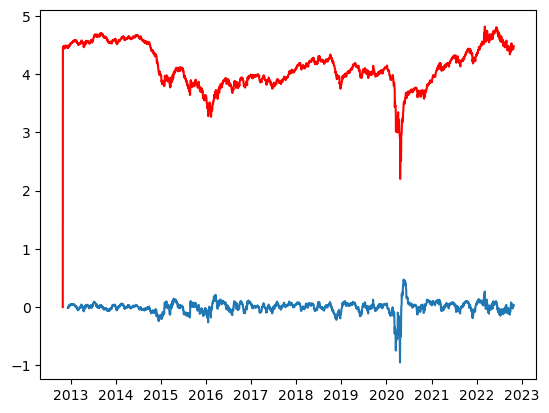

In [44]:
plt.plot(ts_data_log_diff)
plt.plot(results.fittedvalues , color='red')
plt.show()

In [45]:
#model.predict()

In [79]:
oil = pd.read_csv('Oil.csv')

In [80]:
oil1  = oil[['Date','Close/Last']]
oil1.rename(columns={'Date':'ds', 'Close/Last':'y'},inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_53700\3131754805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil1.rename(columns={'Date':'ds', 'Close/Last':'y'},inplace=True)


In [1]:
#oil1.sort_values(by='ds',ascending=True)
#oil1.sort_index(drop=True)

In [69]:
a = oil1.copy()
a['ds'] = pd.to_datetime(a['ds'])

In [70]:
a

,ds,y
0,2022-10-28,87.90
1,2022-10-27,88.26
2,2022-10-26,87.91
3,2022-10-25,85.32
4,2022-10-24,84.58
...,...,...
2543,2012-11-05,85.65
2544,2012-11-02,84.86
2545,2012-11-01,87.09
2546,2012-10-31,86.24


In [72]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(a)

11:19:56 - cmdstanpy - INFO - Chain [1] start processing
11:19:57 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
future =m.make_future_dataframe(periods=365)

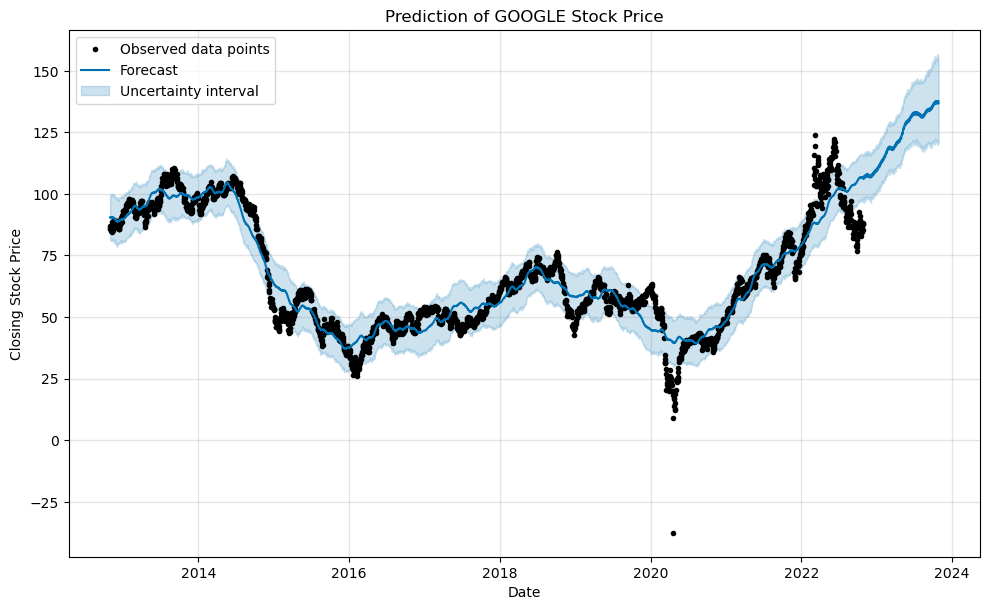

In [77]:
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.legend(loc='best')
plt.show()
